## 1- Import libraries

In [138]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## 2- Import the database
Often it may happen, the dataset in .csv file format has data items separated by a delimiter other than a comma. This includes semicolon, colon, tab space, vertical bars, etc. In such cases, we need to use the sep parameter inside the read.csv() function. the defult delimeter in read_csv is ',' if the seperator is somthing other than ',' we should define it by sep=' '
argument in read_csv. 
some other seperators are: <br> 
1- **' ; '** <br>
2- **' | '** <br>
3- **' : '** <br>
4- **' __ '** <br>
5- **'\s+'**  it matches wth any type of white space <br> 
6- **'[:, | _]'** <br>
7- **'\t'** it only matches with **tab** character<br>

In [139]:
database = pd.read_csv('3kys.cif_ringEdges', sep = '\t' )

In [140]:
database

,NodeId1,Interaction,NodeId2,Distance,Angle,Energy,Atom1,Atom2,Donor,Positive,Cation,Orientation,Model
0,A:196:_:ILE,HBOND:MC_MC,A:203:_:LEU,3.378,44.861,17.0,O,N,A:203:_:LEU,NaN,NaN,NaN,1
1,A:196:_:ILE,VDW:SC_SC,A:405:_:ILE,3.220,NaN,6.0,CD1,CD1,NaN,NaN,NaN,NaN,1
2,A:198:_:THR,HBOND:MC_MC,A:201:_:LEU,3.124,34.375,17.0,N,O,A:198:_:THR,NaN,NaN,NaN,1
3,A:198:_:THR,VDW:MC_SC,A:202:_:ARG,3.755,NaN,6.0,C,CG,NaN,NaN,NaN,NaN,1
4,A:198:_:THR,VDW:SC_SC,A:268:_:ASN,3.715,NaN,6.0,CG2,ND2,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,A:378:_:ASN,HBOND:MC_MC,A:382:_:GLN,2.666,38.796,17.0,O,N,A:382:_:GLN,NaN,NaN,NaN,1
342,A:378:_:ASN,HBOND:MC_MC,A:383:_:GLU,2.907,15.018,17.0,N,O,A:378:_:ASN,NaN,NaN,NaN,1
343,A:379:_:ARG,VDW:MC_SC,A:382:_:GLN,3.633,NaN,6.0,C,NE2,NaN,NaN,NaN,NaN,1
344,A:392:_:PHE,IAC:SC_LIG,A:344:_:P1L,4.215,NaN,0.0,CB,C22,NaN,NaN,NaN,NaN,1


## 3- Parsing the dataset and presenting data (count and values)

In this step the interaction column is splited based on ':' and converted into two separate columns 'Int_type' and 'Int_chain'. split method of strings is exploited to perform this step and then the original column of 'Interaction' is dropped by drop method. 

In [141]:
database[['Int_type','Int_chain']] = database.Interaction.str.split(":", expand =True,)
database.drop(columns =["Interaction"], inplace = True)
database

,NodeId1,NodeId2,Distance,Angle,Energy,Atom1,Atom2,Donor,Positive,Cation,Orientation,Model,Int_type,Int_chain
0,A:196:_:ILE,A:203:_:LEU,3.378,44.861,17.0,O,N,A:203:_:LEU,NaN,NaN,NaN,1,HBOND,MC_MC
1,A:196:_:ILE,A:405:_:ILE,3.220,NaN,6.0,CD1,CD1,NaN,NaN,NaN,NaN,1,VDW,SC_SC
2,A:198:_:THR,A:201:_:LEU,3.124,34.375,17.0,N,O,A:198:_:THR,NaN,NaN,NaN,1,HBOND,MC_MC
3,A:198:_:THR,A:202:_:ARG,3.755,NaN,6.0,C,CG,NaN,NaN,NaN,NaN,1,VDW,MC_SC
4,A:198:_:THR,A:268:_:ASN,3.715,NaN,6.0,CG2,ND2,NaN,NaN,NaN,NaN,1,VDW,SC_SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,A:378:_:ASN,A:382:_:GLN,2.666,38.796,17.0,O,N,A:382:_:GLN,NaN,NaN,NaN,1,HBOND,MC_MC
342,A:378:_:ASN,A:383:_:GLU,2.907,15.018,17.0,N,O,A:378:_:ASN,NaN,NaN,NaN,1,HBOND,MC_MC
343,A:379:_:ARG,A:382:_:GLN,3.633,NaN,6.0,C,NE2,NaN,NaN,NaN,NaN,1,VDW,MC_SC
344,A:392:_:PHE,A:344:_:P1L,4.215,NaN,0.0,CB,C22,NaN,NaN,NaN,NaN,1,IAC,SC_LIG


**Hint** we can count categorical data with **.value_counts()** function and check if a coulmn has empty cells or not we can use **.hasnans** method

In [159]:
database.Int_type.value_counts()

VDW          198
HBOND        111
IAC           20
PIPISTACK     11
IONIC          5
PICATION       1
Name: Int_type, dtype: int64

In [161]:
database.Int_type.hasnans

False

In [162]:
database.Int_chain.value_counts()

SC_SC     174
MC_MC     105
MC_SC      25
SC_LIG     19
SC_MC      17
MC_LIG      6
Name: Int_chain, dtype: int64

## 4- Statistics

To obtain the statistical information I used the seaborn library to show the distributions of distance and energy among different interactions. As illustrated in the boxplot figure below the H-bond has the lowest amount of distance and pipistack has the highest amount of distance among all types of interaction. This analysis is also performed on exploring the amount of energy among different interaction types and as illustrated in barplot the Ionic bond has the highest amount of energy and IAC has the lowest amount of energy. 


<AxesSubplot:xlabel='Int_type', ylabel='Distance'>

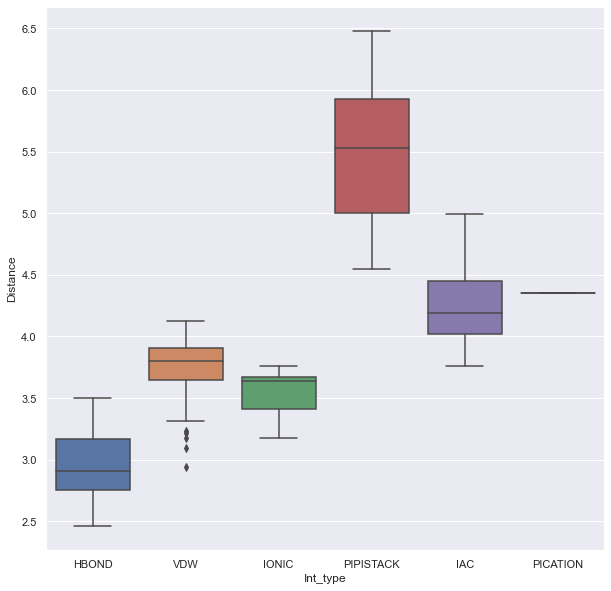

In [118]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.boxplot(data = database, x = 'Int_type' , y ='Distance' )

<AxesSubplot:xlabel='Int_type', ylabel='Energy'>

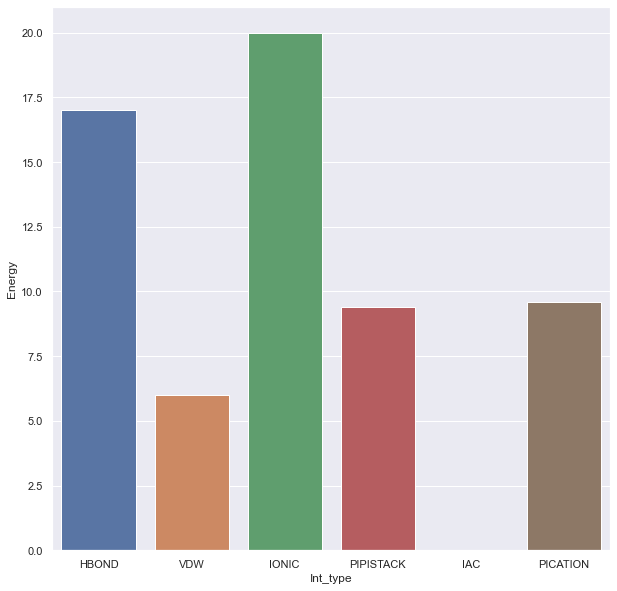

In [121]:
sns.barplot(data = database, x = 'Int_type' , y ='Energy' )